In [ ]:
from sklearn.preprocessing import MinMaxScaler, Binarizer, StandardScaler
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data

# Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Binarization
binarizer = Binarizer(threshold=0.5)
X_binary = binarizer.fit_transform(X)

# Standardization
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)

# Print results
print(f"Original Data: {X[:5]}")
print(f"Scaled Data: {X_scaled[:5]}")
print(f"Binarized Data: {X_binary[:5]}")
print(f"Standardized Data: {X_standardized[:5]}")

Original Data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Scaled Data: [[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]
Binarized Data: [[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]]
Standardized Data: [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [4]:
import numpy as np
from scipy.stats import chi2_contingency

# Define observed data (2x2 contingency table as an example)
# Rows: Categories of one variable
# Columns: Categories of another variable
observed = np.array([
    [50, 30],
    [20, 40]
])

# Calculate Chi-Square statistics
chi2, p, dof, expected = chi2_contingency(observed)

# Print results
print("Observed Frequencies:")
print(observed)

print("\nExpected Frequencies:")
print(expected)

print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("\nObservation: There is a significant association between the variables (Reject Null Hypothesis).")
else:
    print("\nObservation: There is no significant association between the variables (Fail to Reject Null Hypothesis).")

Observed Frequencies:
[[50 30]
 [20 40]]

Expected Frequencies:
[[40. 40.]
 [30. 30.]]

Chi-Square Statistic: 10.5292
Degrees of Freedom: 1
P-value: 0.0012

Observation: There is a significant association between the variables (Reject Null Hypothesis).


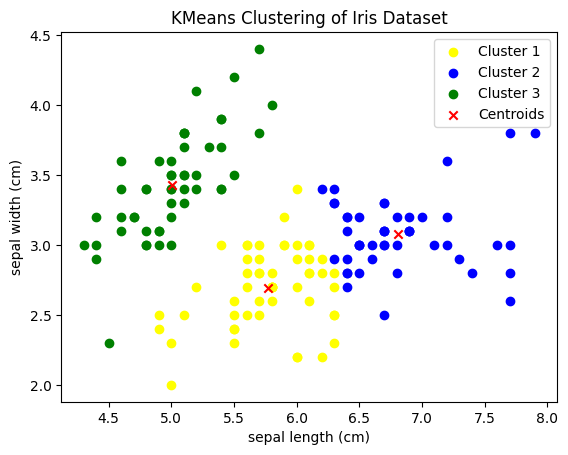

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Applying KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data.iloc[:, :2])

# Visualizing clusters and centroids
plt.scatter(data.iloc[clusters == 0, 0], data.iloc[clusters == 0, 1], c='yellow', label='Cluster 1')
plt.scatter(data.iloc[clusters == 1, 0], data.iloc[clusters == 1, 1], c='blue', label='Cluster 2')
plt.scatter(data.iloc[clusters == 2, 0], data.iloc[clusters == 2, 1], c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', label='Centroids', marker='x')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.title("KMeans Clustering of Iris Dataset")
plt.show()

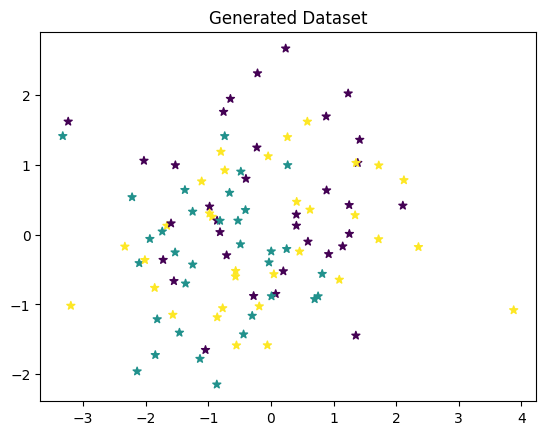

Actual Value: 1
Predicted Value: 1
Accuracy: 0.7575757575757576


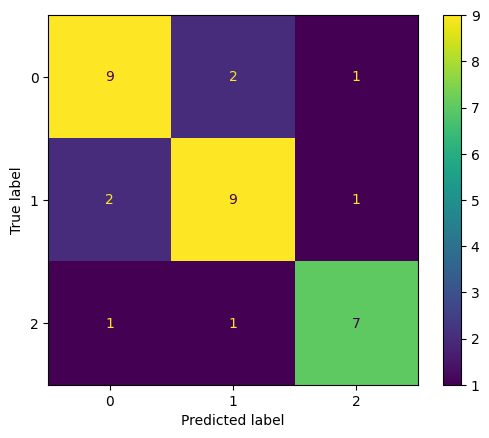

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate dataset
X, y = make_classification(
    n_samples=100,
    n_features=5,
    n_informative=3,  # Increase informative features to 3
    n_redundant=0,
    n_classes=3,  # Keep 3 classes
    n_clusters_per_class=2  # Keep clusters per class as 2
)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, marker="*")
plt.title("Generated Dataset")
plt.show()

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)

# Train Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict a sample
print("Actual Value:", y_test[6])
print("Predicted Value:", model.predict([X_test[6]])[0])

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [9]:
from apyori import apriori

# Sample transactions
data = [
    ['Milk', 'Bread', 'Saffron'],
    ['Milk', 'Saffron'],
    ['Bread', 'Saffron', 'Wafer'],
    ['Bread', 'Wafer']
]

# Prepare data for Apriori by converting each element to a string
records = data
#[[str(item) for item in transaction] for transaction in data]

# Apply Apriori algorithm
rules = apriori(records, min_support=0.5, min_confidence=0.7)

# Convert results to a list
results = list(rules)

# Print the number of rules found
print("Number of Rules:", len(results))

Number of Rules: 4


In [3]:
import pyfpgrowth

# Sample transactions
transactions = [
    ['Milk', 'Bread', 'Saffron'],
    ['Milk', 'Saffron'],
    ['Bread', 'Saffron', 'Wafer'],
    ['Bread', 'Wafer']
]

# Finding frequent patterns with a minimum support of 0.5
patterns = pyfpgrowth.find_frequent_patterns(transactions, support_threshold=0.5)
print("Frequent Patterns:", patterns)

# Generating association rules with a minimum confidence of 0.5
rules = pyfpgrowth.generate_association_rules(patterns, confidence_threshold=0.5)
print("Association Rules:", rules)

Frequent Patterns: {('Milk',): 2, ('Milk', 'Saffron'): 2, ('Bread', 'Milk'): 1, ('Bread', 'Milk', 'Saffron'): 1, ('Wafer',): 2, ('Saffron', 'Wafer'): 1, ('Bread', 'Wafer'): 2, ('Bread', 'Saffron', 'Wafer'): 1, ('Bread',): 3, ('Saffron',): 3, ('Bread', 'Saffron'): 2}
Association Rules: {('Milk',): (('Bread', 'Saffron'), 0.5), ('Saffron',): (('Bread',), 0.6666666666666666), ('Bread', 'Milk'): (('Saffron',), 1.0), ('Bread', 'Saffron'): (('Wafer',), 0.5), ('Milk', 'Saffron'): (('Bread',), 0.5), ('Wafer',): (('Bread', 'Saffron'), 0.5), ('Bread',): (('Saffron',), 0.6666666666666666), ('Bread', 'Wafer'): (('Saffron',), 0.5), ('Saffron', 'Wafer'): (('Bread',), 1.0)}


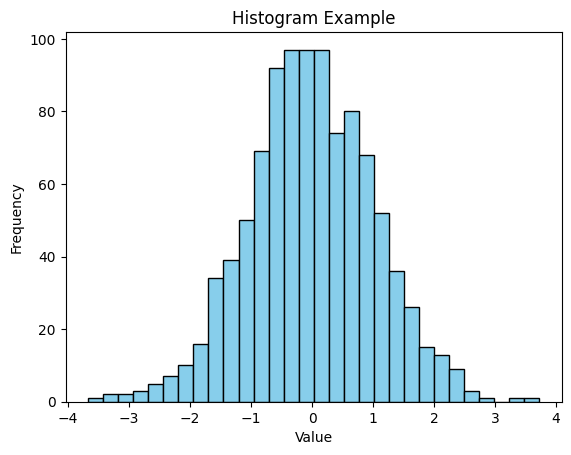

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
data = np.random.randn(1000)

# Plot histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

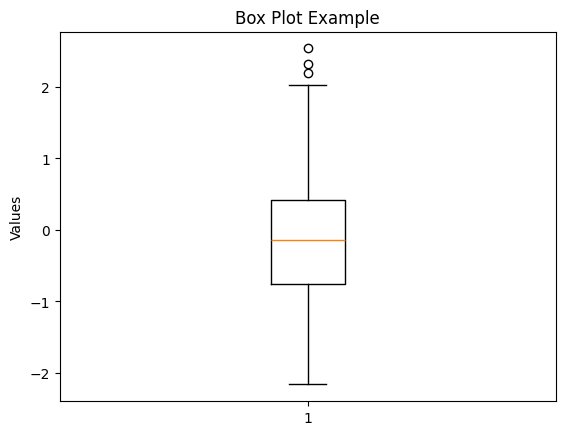

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
data = np.random.randn(100)

# Plot box plot
plt.boxplot(data)

# Add title and labels
plt.title('Box Plot Example')
plt.ylabel('Values')

# Show plot
plt.show()

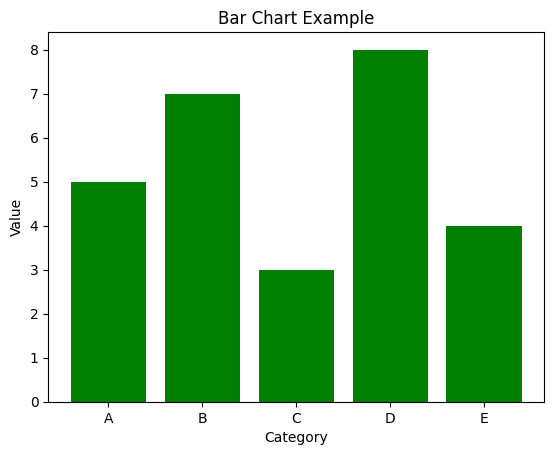

In [7]:
import matplotlib.pyplot as plt

# Sample data
categories = ['A', 'B', 'C', 'D', 'E']
values = [5, 7, 3, 8, 4]

# Plot bar chart
plt.bar(categories, values, color='green')

# Add title and labels
plt.title('Bar Chart Example')
plt.xlabel('Category')
plt.ylabel('Value')

# Show plot
plt.show()

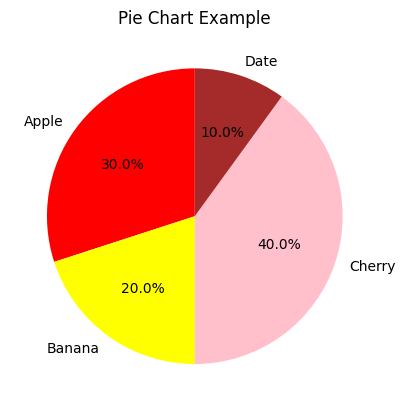

In [2]:
import matplotlib.pyplot as plt

# Sample data
labels = ['Apple', 'Banana', 'Cherry', 'Date']
sizes = [30, 20, 40, 10]

# Plot pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'yellow', 'pink', 'brown'])

# Add title
plt.title('Pie Chart Example')

# Show plot
plt.show()